### 보스턴 주택 가격 예측 세트

- RM: 주택당 평균 방 개수  
- LSTAT: 저소득층 비율   
- PTRATIO: 학생-교사 비율  
- MEDV: 주택 가격 (단위: $1000)

In [1]:
import pandas as pd

df = pd.read_csv('./datasets/housing.csv')
df

,RM,LSTAT,PTRATIO,MEDV
0,6.575,4.98,15.3,504000.0
1,6.421,9.14,17.8,453600.0
2,7.185,4.03,17.8,728700.0
3,6.998,2.94,18.7,701400.0
4,7.147,5.33,18.7,760200.0
...,...,...,...,...
484,6.593,9.67,21.0,470400.0
485,6.120,9.08,21.0,432600.0
486,6.976,5.64,21.0,501900.0
487,6.794,6.48,21.0,462000.0


#### 1. 데이터 탐색

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 489 entries, 0 to 488
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   RM       489 non-null    float64
 1   LSTAT    489 non-null    float64
 2   PTRATIO  489 non-null    float64
 3   MEDV     489 non-null    float64
dtypes: float64(4)
memory usage: 15.4 KB


In [3]:
df.isna().sum()

RM         0
LSTAT      0
PTRATIO    0
MEDV       0
dtype: int64

In [4]:
df.duplicated().sum()

0

1. 결측치, 중복치가 없었습니다.

In [5]:
pre_df = df.copy()
pre_df

,RM,LSTAT,PTRATIO,MEDV
0,6.575,4.98,15.3,504000.0
1,6.421,9.14,17.8,453600.0
2,7.185,4.03,17.8,728700.0
3,6.998,2.94,18.7,701400.0
4,7.147,5.33,18.7,760200.0
...,...,...,...,...
484,6.593,9.67,21.0,470400.0
485,6.120,9.08,21.0,432600.0
486,6.976,5.64,21.0,501900.0
487,6.794,6.48,21.0,462000.0


array([[<Axes: title={'center': 'RM'}>,
        <Axes: title={'center': 'LSTAT'}>],
       [<Axes: title={'center': 'PTRATIO'}>,
        <Axes: title={'center': 'MEDV'}>]], dtype=object)

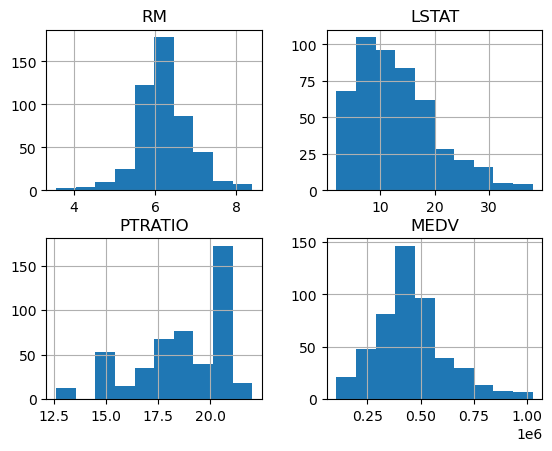

In [6]:
pre_df.hist()

#### 데이터들의 비중도 문제 없었습니다.

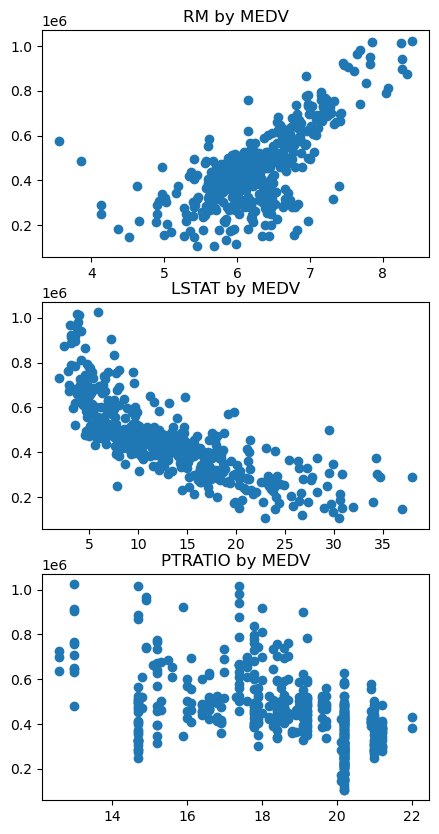

In [7]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(3, figsize=(5, 10))

ax[0].scatter(pre_df['RM'], pre_df['MEDV'])
ax[0].set_title('RM by MEDV')
ax[1].scatter(pre_df['LSTAT'], pre_df['MEDV'])
ax[1].set_title('LSTAT by MEDV')
ax[2].scatter(pre_df['PTRATIO'], pre_df['MEDV'])
ax[2].set_title('PTRATIO by MEDV')

plt.show()

#### 📝 산점도를 확인 결과

1. RM(방 개수)이 높아지면 MEDV(가격)가 올라가는 양의 상관관계를 보여줍니다.
2. LSTAT(저소득층 비율)이 높아지만 MEDV(가격)가 낮아지는 음의 상관관계를보여줍니다.
3. PTRAIO(학생-교사 비율)은 어떠한 상관관계가 있다고 단정 짓기 어려운 형태를 보여주고 있습니다.

∴ RM과 LSTAT 변수는 선형적인 경향을 보이지만, 완전히 선형적이라고 단정하기는 어렵습니다.  
PTRATIO 변수는 비선형적 요소가 더 두드러지게 나타납니다.

### Cycle 1 최초 훈련

### Cycle1-1. Multivariate Linear Regression Model

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

features, targets = pre_df.iloc[:, :-1], pre_df.iloc[:, -1]

X_train, X_test, y_train, y_test = \
train_test_split(features, targets, test_size=0.2, random_state=124)

l_r = LinearRegression()
l_r.fit(X_train, y_train)

LinearRegression()

In [22]:
import numpy as np
from sklearn.metrics import mean_squared_log_error, mean_squared_error, r2_score

def get_evaluation(y_test, prediction):
    lr_MSE = mean_squared_error(y_test, prediction)
    lr_RMSE = np.sqrt(lr_MSE)
    lr_MSLE = mean_squared_log_error(y_test, prediction)
    lr_RMSLE = np.sqrt(mean_squared_log_error(y_test, prediction))
    lr_R2 = r2_score(y_test, prediction)
    print('MSE: {:.4f}, RMSE: {:.4f}, MSLE: {:.4f}, RMSLE: {:.4f}, R2: {:.4f}'\
          .format(lr_MSE, lr_RMSE, lr_MSLE, lr_RMSLE, lr_R2))

In [23]:
prediction = l_r.predict(X_test)
get_evaluation(y_test, prediction)

MSE: 6388828041.6699, RMSE: 79930.1448, MSLE: 0.0452, RMSLE: 0.2126, R2: 0.7811


### Cycle1-2. Polynomial Regression Model

In [11]:
from sklearn.preprocessing import PolynomialFeatures

features, targets = pre_df.iloc[:, :-1], pre_df.iloc[:, -1]

poly_features = PolynomialFeatures(degree=2).fit_transform(features)

X_train, X_test, y_train, y_test = \
train_test_split(poly_features, targets, test_size=0.2, random_state=124)

l_r = LinearRegression()
l_r.fit(X_train, y_train)

LinearRegression()

In [12]:
import numpy as np
from sklearn.metrics import mean_squared_log_error, mean_squared_error, r2_score

def get_evaluation(y_test, prediction):
    po_MSE = mean_squared_error(y_test, prediction)
    po_RMSE = np.sqrt(po_MSE)
    po_MSLE = mean_squared_log_error(y_test, prediction)
    po_RMSLE = np.sqrt(mean_squared_log_error(y_test, prediction))
    po_R2 = r2_score(y_test, prediction)
    print('MSE: {:.4f}, RMSE: {:.4f}, MSLE: {:.4f}, RMSLE: {:.4f}, R2: {:.4f}'\
          .format(po_MSE, po_RMSE, po_MSLE, po_RMSLE, po_R2))

In [13]:
prediction = l_r.predict(X_test)
get_evaluation(y_test, prediction)

MSE: 4177374843.9170, RMSE: 64632.6144, MSLE: 0.0341, RMSLE: 0.1847, R2: 0.8568


### Cycle1-3. Others Regression Model

In [14]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.model_selection import train_test_split

features, targets = pre_df.iloc[:, :-1], pre_df.iloc[:, -1]

X_train, X_test, y_train, y_test = \
train_test_split(features, targets, test_size=0.2, random_state=0)

dt_r = DecisionTreeRegressor(random_state=124)
rf_r = RandomForestRegressor(random_state=124, n_estimators=1000, n_jobs=-1)
gb_r = GradientBoostingRegressor(random_state=124)
xgb_r = XGBRegressor()
lgb_r = LGBMRegressor(n_estimators=100)

models = [dt_r, rf_r, gb_r, xgb_r, lgb_r]
for model in models:
    model.fit(X_train, y_train)
    prediction = model.predict(X_test)
    print(model.__class__.__name__)
    get_evaluation(y_test, prediction)

DecisionTreeRegressor
MSE: 8885250000.0000, RMSE: 94261.6041, MSLE: 0.0658, RMSLE: 0.2566, R2: 0.6871
RandomForestRegressor
MSE: 5451429513.3300, RMSE: 73833.7966, MSLE: 0.0391, RMSLE: 0.1977, R2: 0.8080
GradientBoostingRegressor
MSE: 5477458768.3950, RMSE: 74009.8559, MSLE: 0.0390, RMSLE: 0.1975, R2: 0.8071
XGBRegressor
MSE: 7057310374.5096, RMSE: 84007.7995, MSLE: 0.0493, RMSLE: 0.2221, R2: 0.7515
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000048 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 300
[LightGBM] [Info] Number of data points in the train set: 391, number of used features: 3
[LightGBM] [Info] Start training from score 452649.360614
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No furth

### 📝 Cycle 1 결과

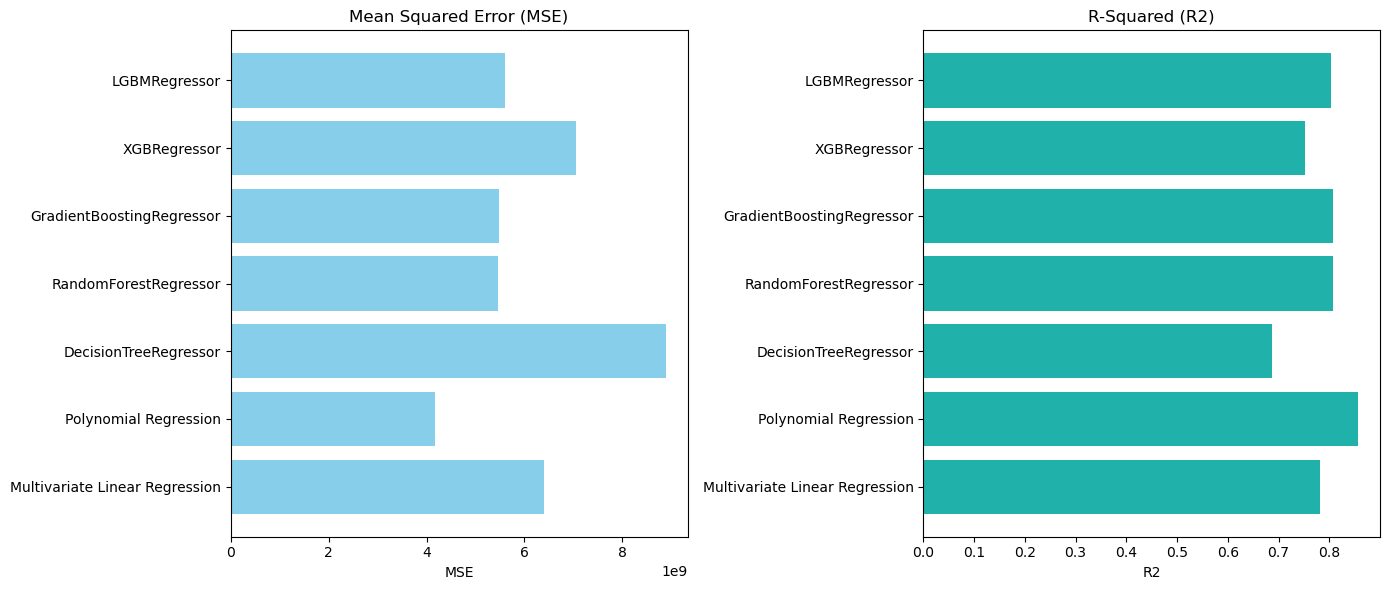

In [57]:
import matplotlib.pyplot as plt

# 모델 이름과 지표값 정의
models = ["Multivariate Linear Regression", "Polynomial Regression", "DecisionTreeRegressor",
          "RandomForestRegressor", "GradientBoostingRegressor", "XGBRegressor", "LGBMRegressor"]

mse = [6388828041.6699, 4177374843.9170, 8885250000.0000, 5451429513.3300, 
       5477458768.3950, 7057310374.5096, 5610625870.6026]

r2 = [0.7811, 0.8568, 0.6871, 0.8080, 
      0.8071, 0.7515, 0.8024]

# 그래프 크기 설정
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

# MSE에 대한 막대 그래프 그리기
axs[0].barh(models, mse, color='skyblue')
axs[0].set_title('Mean Squared Error (MSE)')
axs[0].set_xlabel('MSE')

# R2에 대한 막대 그래프 그리기
axs[1].barh(models, r2, color='lightseagreen')
axs[1].set_title('R-Squared (R2)')
axs[1].set_xlabel('R2')

# 레이아웃 조정
plt.tight_layout()
plt.show()


1. Multivariate Linear Regression  
MSE: 6388828041.6699, RMSE: 79930.1448, MSLE: 0.0452, RMSLE: 0.2126, <strong>R2: 0.7811</strong>

2. Polynomial Regression  
SE: 4177374843.9170, RMSE: 64632.6144, MSLE: 0.0341, RMSLE: 0.1847, <strong>R2: 0.8568</strong>

3. DecisionTreeRegressor  
MSE: 8885250000.0000, RMSE: 94261.6041, MSLE: 0.0658, RMSLE: 0.2566, <strong>R2: 0.6871</strong>

4. RandomForestRegressor  
MSE: 5451429513.3300, RMSE: 73833.7966, MSLE: 0.0391, RMSLE: 0.1977, <strong>R2: 0.8080</strong>

5. GradientBoostingRegressor  
MSE: 5477458768.3950, RMSE: 74009.8559, MSLE: 0.0390, RMSLE: 0.1975, <strong>R2: 0.8071</strong>

6. XGBRegressor  
MSE: 7057310374.5096, RMSE: 84007.7995, MSLE: 0.0493, RMSLE: 0.2221, <strong>R2: 0.7515</strong>

7. LGBMRegressor  
MSE: 5610625870.6026, RMSE: 74904.1112, MSLE: 0.0356, RMSLE: 0.1888, <strong>R2: 0.8024</strong>

#### 📝 해당 결과들을 통해 알 수 있는 사실들은  
1. Linear Regression 보다 Polynomial Regression과 같은 비선형 모델들이 더 높은 성능을 보이는 것으로 보아, 비선형 데이터입니다.
2. RandomForest, GradientBoosting 과 같은 앙방블 모델 역시 비선형성을 잘 포착하며, 높은 성능을 보입니다.
3. Multivariate Linear Regression은 비교적 성능이 낮으며, 이는 데이터의 비선형적 패턴을 충분히 설명하지 못함을 의미합니다.  

∴ 주어진 데이터 세트는 비선형적인 특성을 가지고 있으며, 이를 잘 반영하는 비선형 모델을 사용하는 것이 적합할듯 합니다.

다음 Cycle에서는 RandomForest 방식을 사용하여 과적합 여부를 확인하고 필요 시 과적합을 해소해보도록 하겠습니다.

### Cycle 2 과적합 여부 확인

In [50]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_squared_log_error, r2_score
import numpy as np
import matplotlib.pyplot as plt

features, targets = pre_df.iloc[:, :-1], pre_df.iloc[:, -1]

# 데이터를 학습 세트와 테스트 세트로 분리
X_train, X_test, y_train, y_test = train_test_split(features, targets, test_size=0.2, random_state=124)

# RandomForestRegressor 초기화
rf_r = RandomForestRegressor(random_state=124)

# 교차 검증 수행 및 R2 점수의 평균과 표준 편차 계산
cv_scores = cross_val_score(rf_r, X_train, y_train, cv=5, scoring='r2')
mean_cv_r2 = np.mean(cv_scores)
std_cv_r2 = np.std(cv_scores)
print(f"평균 CV R2: {mean_cv_r2:.4f}, 표준 편차 CV R2: {std_cv_r2:.4f}")

# 학습 데이터에 모델 적합
rf_r.fit(X_train, y_train)

# 학습 세트에 대한 예측
y_train_pred = rf_r.predict(X_train)

# 테스트 세트에 대한 예측
y_test_pred = rf_r.predict(X_test)

# 평가 지표를 계산하는 함수 정의
def get_evaluation(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    msle = mean_squared_log_error(y_true, y_pred)
    rmsle = np.sqrt(msle)
    r2 = r2_score(y_true, y_pred)
    print(f"MSE: {mse:.4f}, RMSE: {rmse:.4f}, MSLE: {msle:.4f}, RMSLE: {rmsle:.4f}, R2: {r2:.4f}")

# 학습 세트에 대한 평가 결과 출력
print("학습 세트 평가")
get_evaluation(y_train, y_train_pred)

# 테스트 세트에 대한 평가 결과 출력
print("테스트 세트 평가")
get_evaluation(y_test, y_test_pred)

평균 CV R2: 0.7945, 표준 편차 CV R2: 0.0356
학습 세트 평가
MSE: 686486164.4655, RMSE: 26200.8810, MSLE: 0.0055, RMSLE: 0.0740, R2: 0.9744
테스트 세트 평가
MSE: 4220214655.5000, RMSE: 64963.1792, MSLE: 0.0336, RMSLE: 0.1833, R2: 0.8554


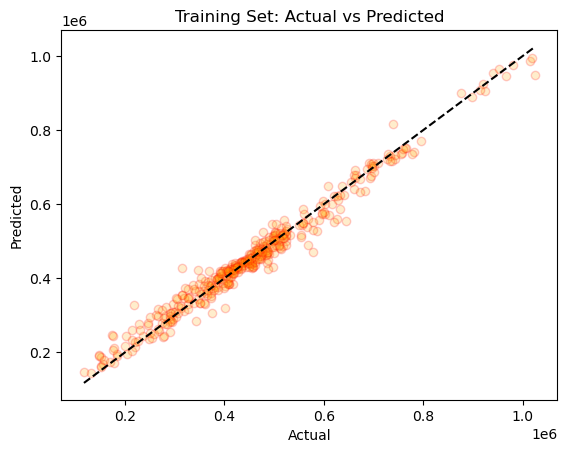

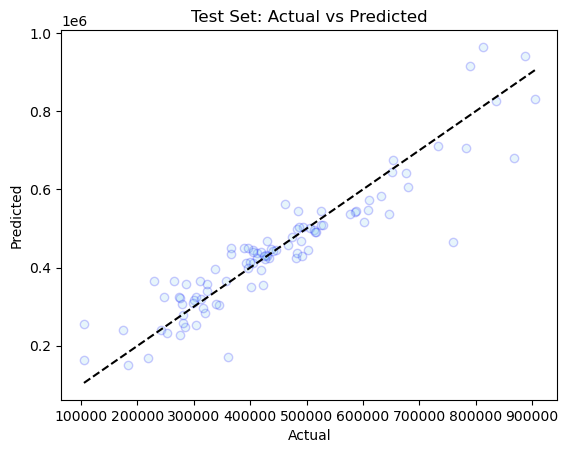

In [51]:
# 학습 세트에 대한 실제 값과 예측 값의 산점도 그래프
fig, ax = plt.subplots()
ax.scatter(y_train, y_train_pred, edgecolors='red', c='orange', alpha=0.2)
ax.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'k--')
ax.set_xlabel("Actual")
ax.set_ylabel("Predicted")
ax.set_title("Training Set: Actual vs Predicted")
plt.show()

# 테스트 세트에 대한 실제 값과 예측 값의 산점도 그래프
fig, ax = plt.subplots()
ax.scatter(y_test, y_test_pred, edgecolors='blue', c='skyblue', alpha=0.2)
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--')
ax.set_xlabel("Actual")
ax.set_ylabel("Predicted")
ax.set_title("Test Set: Actual vs Predicted")
plt.show()

### Cycle 2 과적합 여부 확인 결과

1. 학습 세트에서 매우 높은 R2 점수를 얻은 것에 비해 테스트 세트에서는 낮아진 R2 점수를 보입니다.
2. RMSE 또한 학습 세트에 비해 테스트 세트에서 크게 증가합니다.  
   이는 모델이 학습 데이터에 비해 테스트 데이터에서 더 큰 오차를 발생시키고 있다는 것을 나타냅니다.

위의 평가 지표들을 종합해 보면, 모델이 학습 데이터에 비해 테스트 데이터에서 성능이 많이 떨어지는 것을 볼 수 있습니다.  
이는 과적합임을 보여주는 결과들 입니다.

### Cycle 3 과적합 해소

In [52]:
from sklearn.model_selection import GridSearchCV

# 하이퍼파라미터 그리드 정의
param_grid = {
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'n_estimators': [100, 200, 300]
}

# GridSearchCV를 사용하여 최적의 하이퍼파라미터 찾기
grid_search = GridSearchCV(estimator=rf_r, param_grid=param_grid, cv=5, n_jobs=-1, scoring='r2')
grid_search.fit(X_train, y_train)

# 최적의 하이퍼파라미터 출력
print(f"최적의 하이퍼파라미터: {grid_search.best_params_}")

# 최적의 모델로 예측 수행
best_rf_r = grid_search.best_estimator_
y_train_pred = best_rf_r.predict(X_train)
y_test_pred = best_rf_r.predict(X_test)

# 학습 세트와 테스트 세트 평가
print("학습 세트 평가")
get_evaluation(y_train, y_train_pred)

print("테스트 세트 평가")
get_evaluation(y_test, y_test_pred)

최적의 하이퍼파라미터: {'max_depth': 20, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 100}
학습 세트 평가
MSE: 2282875636.8209, RMSE: 47779.4478, MSLE: 0.0170, RMSLE: 0.1303, R2: 0.9148
테스트 세트 평가
MSE: 3917054854.6316, RMSE: 62586.3791, MSLE: 0.0308, RMSLE: 0.1755, R2: 0.8658


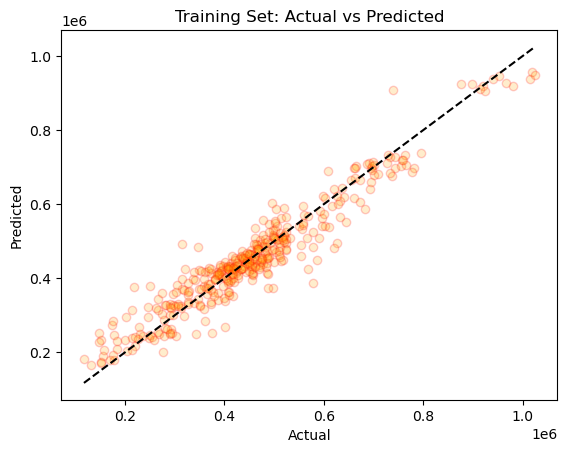

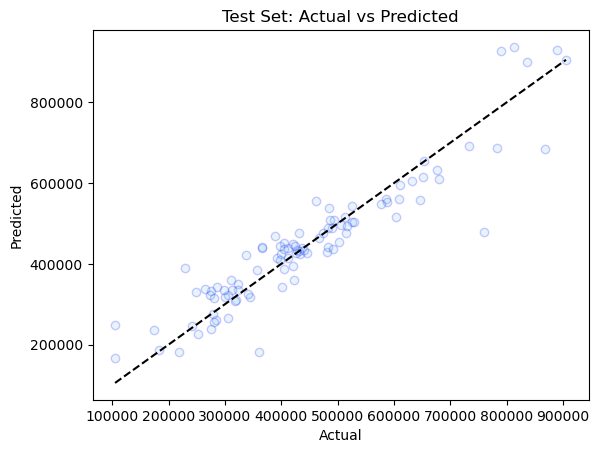

In [53]:
# 학습 세트에 대한 실제 값과 예측 값의 산점도 그래프
fig, ax = plt.subplots()
ax.scatter(y_train, y_train_pred, edgecolors='red', c='orange', alpha=0.2)
ax.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'k--')
ax.set_xlabel("Actual")
ax.set_ylabel("Predicted")
ax.set_title("Training Set: Actual vs Predicted")
plt.show()

# 테스트 세트에 대한 실제 값과 예측 값의 산점도 그래프
fig, ax = plt.subplots()
ax.scatter(y_test, y_test_pred, edgecolors='blue', c='skyblue', alpha=0.2)
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--')
ax.set_xlabel("Actual")
ax.set_ylabel("Predicted")
ax.set_title("Test Set: Actual vs Predicted")
plt.show()

1. 학습 세트와 테스트 세트의 R2 점수 차이가 줄어들었습니다.  
하지만 여전히 학습 세트의 R2 점수가 더 높지만 큰 차이는 아닙니다.

2. RMSE도 학습 세트와 테스트 세트 사이에서 큰 차이가 나지 않으며, 이전 결과보다 개선 되었습니다.

- 최적의 하이퍼파라미터를 사용한 후 모델의 성능이 더 균형을 이루었으며, 과적합 문제가 완화되었습니다.  
  학습 세트와 테스트 세트 모두에서 높은 R2 점수를 기록하면서도 과적합 문제를 줄일 수 있었습니다.